# Second degree moments of earthquake rupture (or stress glut moments)

Written by Minseong Seo, August 2, 2024

**<u>Note</u>** Installations of `Numba` (https://numba.readthedocs.io/en/stable/index.html), `CVXPY` (https://www.cvxpy.org/index.html), and `ObsPy` (https://docs.obspy.org) are required to run the scripts.

## Overview

In observational seismology, earthquake is often described as point source, fully quantified by double-couple moment tensor along with centroid time and location. Such point-source approximation has been quite successful in reproducing the observed waveforms at sufficiently low frequencies relative to spatiotemporal source extent. Nevertheless, in reality, any earthquake occurs through rupture of finite area on the fault plane that usually scales with seismic moment. Provided that the resolution is sufficient for observing such finite-source effects of spatiotemporal rupture, there exist multiple techniques which enable the inference of finite source attributes of earthquake - duration, area, and directivity.

Most widely used technique includes spectral domain approach, in which corner frequency $\left(f_{c}\right)$ is estimated from the displacement (or velocity, acceleration) spectrum, and related to rupture radius assuming particular dynamic rupture model, such as Brune's or Madariaga's source models. Other approaches include effective utilization of time-domain measurables, for example, source durations. The apparent source durations observed as function of azimuths and take-off angles could be utilized to invert for the finite source attributes assuming simple kinematic model (e.g., line source model). However, either corner-frequency or source-duration-based methods do not have enough resolution for fully resolving the actual spatiotemporal slip distribution during the rupture process. Finite-fault inversion methods have been developed to invert for detailed spatiotemporal slip history of earthquake that best explains the observed waveforms - both phase and amplitude information. Although various approaches have been developed over more than decades to stabilize the solution, inherent non-uniqueness problem is well known even for the case of dense station coverage due to enormously large number of parameters to fit (slip function at each subfault). Also, there is no guarantee that the kinematically best fitting model is dynamically plausible as well.

Above mentioned methods are common in that they rely on the particular parametrization of spatiotemporal rupture process in order to invert for the parameters that best explain the observables - corner frequency, source duration, or entire waveform. Most commonly adopted such parameters include rupture length $\left(L\right)$, width $\left(W\right)$, duration $\left(T\right)$, propagation speed $\left(V_{r}\right)$, and directivity. Depending on the simplicity of assumed model, subset of these parameters are often fixed to supposed values. For instance, practitioners of corner frequency method often assume that the rupture speed is about $0.9$ $\times$ the shear wave velocity $\left(V_{S}\right)$, in order to adopt the result from Madariaga's quasidynamic rupture model. However, the resulting parameters may be significantly biased if such *a priori* assumptions are inaccurate.

The second degree moments are statistically well-grounded representations of spatiotemporal slip distribution (or moment rate density function), $\dot{f}\left(\mathbf{r},\,t\right)$. In fact, the first degree moments are centroid time $\left(t_{0}\right)$ and location $\left(\mathbf{r}_{0}\right)$, which are defined as temporal and spatial average of $\dot{f}\left(\mathbf{r},\,t\right)$:

$$
\begin{equation}
    \mathbf{r}_{0}=\int\dot{f}\left(\mathbf{r},\,t\right)\mathbf{r}dVdt \\
    t_{0}=\int\dot{f}\left(\mathbf{r},\,t\right)tdVdt.
\end{equation}
$$

Note that the source time function (or moment rate function), $\mathrm{STF}\,(t)$ is $\dot{f}\left(\mathbf{r},\,t\right)$ integrated over the source volume, $\displaystyle\mathrm{STF}\,(t)=\int\dot{f}\left(\mathbf{r},\,t\right)dV$.

On the other hand, the second degree moments characterize the variance of $\dot{f}\left(\mathbf{r},\,t\right)$ - spatial, temporal, and spatiotemporal variances. The spatial variance is related to source volume (or area), the temporal variance is related to source duration, and the spatiotemporal variance is related to the directivity of centroid. The second moments are defined as follows (while it may look intimidating at first glance, they are simply the equations for the variance in statistics):

$$
\begin{equation}
    \pmb\mu^{\left(2,0\right)}=\iint\dot{f}\left(\mathbf{r},\,t\right)\left(\mathbf{r}-\mathbf{r}_{0}\right)\left(\mathbf{r}-\mathbf{r}_{0}\right)dVdt \\
    \mu^{\left(0,2\right)}=\iint\dot{f}\left(\mathbf{r},\,t\right)\left(t-t_{0}\right)\left(t-t_{0}\right)dVdt \\
    \pmb\mu^{\left(1,1\right)}=\iint\dot{f}\left(\mathbf{r},\,t\right)\left(\mathbf{r}-\mathbf{r}_{0}\right)\left(t-t_{0}\right)dVdt.
\end{equation}
$$

Note that we use subscript $0$ to denote the centroid and Greek alphabet $\mu$ (or $\pmb\mu$) to denote the second degree moments. For more physically motivated and mathematically rigorous definition of second degree moments, I refer to **Atterholt & Ross (2022)**. Similarly, you can define the higher-order moments (3rd, 4th, and so on), where 3rd order moment refers to skewness and 4th order moment refers to kurtosis. Those higher order degree moments may also have meaningful physical interpretations, but they are out of scope for this tutorial (see **Jordan & Juarez, 2019; 2021** if interested).

It is worth to note that the spatial moment, $\pmb\mu^{\left(2,0\right)}$ is $3\times3$ tensor, the temporal moment, $\mu^{\left(0,2\right)}$ is a scalar, and the spatiotemporal moment, $\pmb\mu^{\left(1,1\right)}$ is $3\times1$ vector. Since $\pmb\mu^{\left(2,0\right)}$ is symmetric tensor from its construction, total of $10$ indenpendent scalar variables fully characterize the second degree moments of $\dot{f}\left(\mathbf{r},\,t\right)$. However, if we have *a priori* knowledge of fault plane over which rupture occurred, we can further reduce the number of independent variables to $6$ $\left(=3+1+2\right)$.

The second degree moments are mathematically sound representations of finite earthquake source, but they are not intuitive compared to the generally adopted parameters $\left(L,\,W,\,T\right)$. Hence, it is useful to convert the second moments to more interpretable variables, such as chracteristic length $\left(L_{c}\right)$, width $\left(W_{c}\right)$, duration $\left(\tau_{c}\right)$, centroid velocity $\left(\mathbf{v}_{0}\right)$, and directivity ratio. Note that we use the term *chracteristic* to emphasize the weighted nature of such measures, which may differ from the actual rupture length, width, and duration.

$$
\begin{equation}
    x_{c}\left(\hat{\mathbf{n}}\right)=2\sqrt{\hat{\mathbf{n}}^{T}\pmb\mu^{\left(2,0\right)}\hat{\mathbf{n}}} \\
    \tau_{c}=2\sqrt{\mu^{\left(0,2\right)}} \\
    v_{c}=\frac{L_{c}}{\tau_{c}} \\
    \mathbf{v}_{0}=\frac{\pmb\mu^{\left(1,1\right)}}{\mu^{\left(0,2\right)}}.
\end{equation}
$$

Note that $L_{c}$ is the maximum value of $x_{c}\left(\hat{\mathbf{n}}\right)$, corresponding to the largest eigenvalue of $\pmb\mu^{\left(2,0\right)}$ and $W_{c}$ corresponds to the second largest eigenvalue of $\pmb\mu^{\left(2,0\right)}$. Moreover, the eigenvector corresponding to $L_{c}$ characterize the orientation of largest dimension (or length) in three-dimensional space. $v_{c}$ is called the characteristic (or apparent rupture) velocity, which could be understood as the relative velocity of two opposite rupture fronts in the case of line source model. The ratio of $|\mathbf{v}_{0}|$ to $v_{c}$ is called the *directivity ratio*, which ranges from $0$ to $1$. In case of purely symmetric bilateral rupture, the ratio takes value of $0$, while for the case of purely unilateral rupture, the ratio takes value of $1$. Hence, the ratio could be used as useful measure for assessing the degree of rupture directivity (or overall symmetry of rupture propagation). Also, note that $\tau_{c}$ is equal to the standard deviation of source time function, $\mathrm{STF}\,(t)$ (which means that $\tau_{c}$ would be approximately half the actual source duration for truncated Gaussian $\mathrm{STF}$).

Below, I include the scripts of simple 2D forward kinematic rupture models to better understand the fundamental aspects of second degree moments. Note that only $6$ variables fully characterize the second degree moments, as rupture is simulated on the assumed fault plane (horizontal axis - strike, vertical axis - dip).

### Define functions

In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
%matplotlib inline
# from tqdm import tqdm
from numba import njit # For fast iteration

# Hide Numba warning message
import warnings
warnings.filterwarnings("ignore")

**`second_moments`**

In [2]:
@njit(nopython=True)
def second_moments(Lc, Wc, N, xc, yc, Vr, Vs):

    '''
    Calculate first and second degree moments from forward rupture model
    
    Input params
        Lc: characteristic rupture length
        Wc: characteristic rupture width
        N: number of grid along major axis of elliptical rupture area
        xc, yc: coordinate of hypocenter
        Vr: rupture front propagation speed
        Vs: Shear wave velocity at the source
        
    Output params
        t0: centroid time
        x0, y0: coordinate of spatial centroid
        m2: second degree moments (tt, xt, yt, xx, xy, yy)
        T: Rupture time matrix
    '''
    
    # Grid setting
    x=np.linspace(-Lc, Lc, N) # Along the strike
    y=np.linspace(-Wc, Wc, int(np.round((N/Lc)*Wc))) # Along the dip
    dx, dy=x[1]-x[0], y[1]-y[0] # Spatial grid size
    t=np.linspace(0, 2*(Lc/Vr), N) # Temporal gridding
    dt=t[1]-t[0] # Temporal grid size

    # Define the slip distribution (uniform slip)
    W=np.zeros((len(x), len(y))) # Scaled slip on each grid
    T=np.zeros((len(x), len(y))) # Rupture timing
    for i in np.arange(0, len(x)):
        for j in np.arange(0, len(y)):
            ra2=(x[i]/Lc)**2+(y[j]/Wc)**2
            if ra2<=1:
                W[i][j]=1.
                dist=np.sqrt((x[i]-xc)**2+(y[j]-yc)**2) # Distance from hypocenter to rupture front
                T[i][j]=dist/Vr # Rupture front arrival time
            else:
                T[i][j]=np.nan
    
    # Assume STF at each grid is a Dirac delta functionR
    sum_f=0.
    for i in np.arange(0, len(x)):
        for j in np.arange(0, len(y)):
            if W[i][j]==1:
                sum_f += dx*dy

    # Calculate centroid location and time
    x0, y0, t0=0., 0., 0.
    for i in np.arange(0, len(x)):
        for j in np.arange(0, len(y)):
            if W[i][j]==1.:
                x0 += (x[i]*dx*dy)/sum_f
                y0 += (y[j]*dx*dy)/sum_f
                dist=np.sqrt((x[i]-xc)**2+(y[j]-yc)**2)
                t0 += ((dist/Vr)*dx*dy)/sum_f

    # Calculate second moments
    xx, xy, yy, xt, yt, tt=0., 0., 0., 0., 0., 0.
    for i in np.arange(0, len(x)):
        for j in np.arange(0, len(y)):
            if W[i][j]==1.:
                xx += ((x[i]-x0)**2)*dx*dy/sum_f
                yy += ((y[j]-y0)**2)*dx*dy/sum_f
                xy += (x[i]-x0)*(y[j]-y0)*dx*dy/sum_f
                dist=np.sqrt((x[i]-xc)**2+(y[j]-yc)**2)
                xt += (x[i]-x0)*(dist/Vr-t0)*dx*dy/sum_f
                yt += (y[j]-x0)*(dist/Vr-t0)*dx*dy/sum_f
                tt += ((dist/Vr-t0)**2)*dx*dy/sum_f

    m2=np.array([tt, xt, yt, xx, xy, yy])
    
    return np.array([t0, x0, y0]), m2, T

In [3]:
[t0, x0, y0], m2, T=second_moments(1., 1., 10, 0., 0., 2.9, 3.5);

**`rupture_params`**

In [4]:
@njit(nopython=True)
def rupture_params(m2):
    '''
    Convert second moments to interpretable rupture parameters
    
    Input params
        m2: second degree moments (tt, xt, yt, xx, xy, yy)
    
    Output params
        tauc: characteristic duration
        Lc: characteristic length
        Wc: chracteristic width
        vx, vy: centroid velocity (x: strike, y: dip)
        v0: magnitude of centroid velocity
        vc: characteristic velocity
        dir_ratio: v0/vc (unilateral: 1 / bilateral: 0)
        rake: anticlockwise angle of centroid vector direction from strike
        alpha: angle of major axis (largest eigenvector) relative to strike 
    '''
    
    # Spatial second moments
    X=np.array([[m2[3], m2[4]],
                [m2[4], m2[5]]])
    U, S, Vh=svd(X, full_matrices=True) # Singular value decomposition
    paxis=U[:, 0] # Eigenvector corresponding to Lc
    alpha=((np.rad2deg(np.arctan2(-paxis[1], paxis[0]))%360)+360)%360

    # Chracteristic dimensions (in meters)
    Lc=2*np.sqrt(S[0])*1000
    Wc=2*np.sqrt(S[1])*1000

    # Characteristic duration (in seconds)
    tauc=2*np.sqrt(m2[0])

    # Rupture vector
    vx=m2[1]/m2[0] # strike-component
    vy=m2[2]/m2[0] # dip-component (positive down-dip)
    rake=((np.rad2deg(np.arctan2(-vy, vx))%360)+360)%360

    # Directivity ratio
    v0=np.sqrt(vx**2+vy**2)*1000
    vc=Lc/tauc
    dir_ratio=np.abs(v0)/vc
    
    return np.array([tauc, Lc, Wc, vx, vy, v0, vc, dir_ratio, rake, alpha])

In [5]:
rupture_params(m2);

**`plot_rupture`**

In [6]:
def plot_rupture(Lc, Wc, N, xc, yc, Vr, Vs, tauc):
    
    '''
    Visualize elliptical forward model rupture with rupture front isochrones
    Should modify the code to rotate the ellipse using angle alpha
    
    Input params
        Lc: characteristic length
        Wc: characteristic width
        N: number of grid along major axis of elliptical rupture area
        xc, yc: coordinate of hypocenter
        Vr: rupture front propagation speed
        Vs: Shear wave velocity at the source
        tauc: characteristic duration
    '''
    
    # Grid setting
    x=np.linspace(-Lc, Lc, N) # Along the strike
    y=np.linspace(-Wc, Wc, int(np.round((N/Lc)*Wc))) # Along the dip
    dx, dy=x[1]-x[0], y[1]-y[0]
    t=np.linspace(0, 2*(Lc/Vr), N)
    dt=t[1]-t[0]

    # Define slip distribution
    W=np.zeros((len(x), len(y))) # Scaled slip on each grid
    T=np.zeros((len(x), len(y))) # Rupture timing
    for i in np.arange(0, len(x)):
        for j in np.arange(0, len(y)):
            ra2=(x[i]/Lc)**2+(y[j]/Wc)**2
            if ra2<=1:
                W[i][j]=1.
                dist=np.sqrt((x[i]-xc)**2+(y[j]-yc)**2)  # Distance from hypocenter to rupture front
                T[i][j]=dist/Vr # Rupture front arrival time
            else:
                T[i][j]=np.nan    
                
    # Define elliptical area for plotting
    x_elps1=x
    x_elps2=np.flip(x)
    y_elps1=Wc*np.sqrt(1-(x/Lc)**2)
    y_elps2=-np.flip(y_elps1)
    x_elps=np.concatenate([x_elps1, x_elps2])
    y_elps=np.concatenate([y_elps1, y_elps2])

    # Plotting
    plt.figure()
    plt.title(f"Aspect ratio = {int(np.max([Lc, Wc])/np.min([Lc, Wc]))}", fontsize=18, pad=10)
    plt.plot(x_elps, y_elps, 'k', linewidth=2) # Plot ellipse boundary

    # Create the contour plot and store the result
    X, Y=np.meshgrid(y, x)
    contour_set=plt.contour(Y, X, T, 1000, linewidths=2)

    # Add a colorbar for the contour plot
    plt.colorbar(contour_set)

    # Set color limits for the colorbar
    contour_set.set_clim(0, 2.2*tauc) # Automatically define min/max colorbar limit based on tauc

    plt.axis("equal")
    plt.set_cmap("jet")
    plt.xlim(-1.2*Lc, 1.2*Lc)
    plt.ylim(-1.2*Wc, 1.2*Wc)
    plt.xlabel("Along Strike (km)", fontsize=18, labelpad=10)
    plt.ylabel("Along Dip (km)", fontsize=18, labelpad=10)
    plt.gca().tick_params(labelsize=15)
    plt.gca().invert_yaxis()
    plt.show();    

#### Unilateral rupture

First, let's consider the case of purely unilateral rupture that takes place over the pre-defined elliptical rupture area. The rupture is *purely unilateral* in the sense that hypocenter is located at the left end of rupture area (i.e. on the boundary of ellipse). Aspect ratio $\left(L_{c}/W_{c}\right)$ is assumed as $2$, but it is recommended to test other values (for example, it would be interesting to compare the results for two extreme cases - circular rupture and very thin rupture). Furthermore, note that the number of grids $\left(N\right)$ should be sufficiently large to accurately simulate the case of very thin rupture (still, runtime should be comparable to circular area with smaller $N$ as total number of grid is greatest for the circular area). For the example shown below, $N=10,000$ is used (try other values of $N$ as well).

In [7]:
###### Define the parameters ###### 
AR=2. # L/W
Lc=1. # km along the strike
Wc=Lc/AR # km along the dip
Vs=3.55 # Shear wave velocity (km/s)
Vr=Vs*0.8 # Rupture velocity (km/s)

###### Hypocenter location ###### 
xc, yc=-Lc, 0. # Unilateral case
N=10000 # Accuracy increases with grid number

Centroid time: 0.3655 s
Centroid location: -0.0000, -0.0000 km
Rupture duration: 0.7042 s
Characteristic duration: 0.3415 s
Characteristic length: 1000.0011 m
Characteristic width: 499.9979 m
Directivity vector: 2.9201, -0.0000 km/s
Centroid vector orientation: 0.0000°
Major axis orientation: 180.0000°
Characteristic rupture velocity: 2928.1724 km/s
Directivity ratio: 0.9972


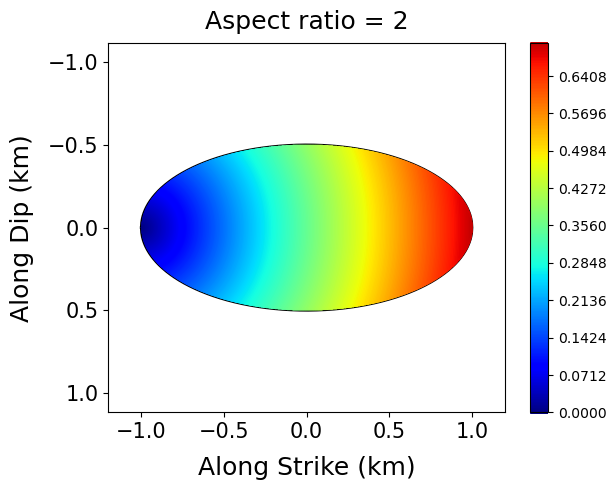

In [8]:
# Calculate second moment attributes
[t0, x0, y0], m2, T=second_moments(Lc, Wc, N, xc, yc, Vr, Vs)
dura=np.nanmax(T) # Actual rupture duration
tauc, Lc, Wc, vx, vy, v0, vc, dir_ratio, θ, α=rupture_params(m2)

print(f"Centroid time: {t0:.4f} s")
print(f"Centroid location: {x0:.4f}, {y0:.4f} km")
print(f"Rupture duration: {dura:.4f} s")
print(f"Characteristic duration: {tauc:.4f} s")
print(f"Characteristic length: {Lc:.4f} m")
print(f"Characteristic width: {Wc:.4f} m")
print(f"Directivity vector: {vx:.4f}, {vy:.4f} km/s")
print(f"Centroid vector orientation: {θ:.4f}°")
print(f"Major axis orientation: {α:.4f}°")
print(f"Characteristic rupture velocity: {vc:.4f} km/s")
print(f"Directivity ratio: {dir_ratio:.4f}")

# Plot rupture propagation on ellipse
Lc=1.
Wc=Lc/AR
N=1000 # Reduce number of grids practically only for plotting purpose
plot_rupture(Lc, Wc, N, xc, yc, Vr, Vs, tauc);

Note that the directivity ratio is not exactly $1$, even though the hypocenter is located at the boundary of rupture area. This could be understood as the bilateral component along the dip direction incorporated in the directivity ratio. Imagine that as you gradually lengthen the vertical dimension while shrinking the horizontal dimension, rupture would eventually become dominantly bilateral, chracterized by the directivity ratio very close to $0$ (but slightly positive).

#### Bilateral rupture

Similarly, you can also test the case of purely bilateral rupture. Note that for the same set of $L_{c}$ and $W_{c}$, centroid location is invariant, but $\tau_{c}$ becomes much shorter as it would take much less time for the rupture fronts to arrive at the edges. Also, note that the $v_{c}$ is approximately twice the rupture propagation speed.

In [9]:
###### Define the parameters ###### 
AR=2. # L/W
Lc=1. # km along the strike
Wc=Lc/AR # km along the dip
Vs=3.55 # Shear wave velocity (km/s)
Vr=Vs*0.8 # Rupture velocity (km/s)

###### Hypocenter location ###### 
xc, yc=0., 0. # Bilateral case
N=10000 # Accuracy increases with grid number

Centroid time: 0.1810 s
Centroid location: -0.0000, -0.0000 km
Rupture duration: 0.3521 s
Characteristic duration: 0.1548 s
Characteristic length: 1000.0011 m
Characteristic width: 499.9979 m
Directivity vector: 0.0000, 0.0000 km/s
Centroid vector orientation: 357.9503°
Major axis orientation: 180.0000°
Characteristic rupture velocity: 6460.1433 km/s
Directivity ratio: 0.0000


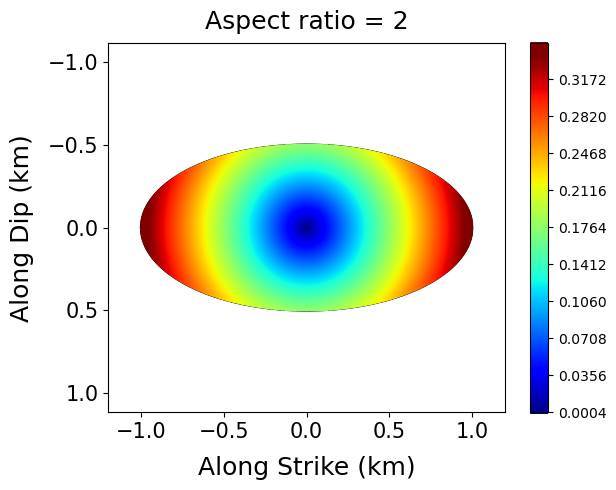

In [10]:
# Calculate second moment attributes
[t0, x0, y0], m2, T=second_moments(Lc, Wc, N, xc, yc, Vr, Vs)
dura=np.nanmax(T) # Actual rupture duration
tauc, Lc, Wc, vx, vy, v0, vc, dir_ratio, θ, α=rupture_params(m2)

print(f"Centroid time: {t0:.4f} s")
print(f"Centroid location: {x0:.4f}, {y0:.4f} km")
print(f"Rupture duration: {dura:.4f} s")
print(f"Characteristic duration: {tauc:.4f} s")
print(f"Characteristic length: {Lc:.4f} m")
print(f"Characteristic width: {Wc:.4f} m")
print(f"Directivity vector: {vx:.4f}, {vy:.4f} km/s")
print(f"Centroid vector orientation: {θ:.4f}°")
print(f"Major axis orientation: {α:.4f}°")
print(f"Characteristic rupture velocity: {vc:.4f} km/s")
print(f"Directivity ratio: {dir_ratio:.4f}")

# Plot rupture propagation on ellipse
Lc=1.
Wc=Lc/AR
N=1000 # Reduce number of grids practically only for plotting purpose
plot_rupture(Lc, Wc, N, xc, yc, Vr, Vs, tauc);

#### Vertical rupture

Lastly, we can also test the case of vertical (up-dip) rupture where the rupture is nucleated at the bottom of the rupture area and propagates upward.

In [11]:
###### Define the parameters ###### 
AR=2. # L/W
Lc=1. # km along the strike
Wc=Lc/AR # km along the dip
Vs=3.55 # Shear wave velocity (km/s)
Vr=Vs*0.8 # Rupture velocity (km/s)

###### Hypocenter location ###### 
xc, yc=0., Wc # Updip rupture
N=10000 # Accuracy increases with grid number

Centroid time: 0.2476 s
Centroid location: -0.0000, -0.0000 km
Rupture duration: 0.4066 s
Characteristic duration: 0.1835 s
Characteristic length: 1000.0011 m
Characteristic width: 499.9979 m
Directivity vector: -0.0000, -2.0506 km/s
Centroid vector orientation: 90.0000°
Major axis orientation: 180.0000°
Characteristic rupture velocity: 5449.0555 km/s
Directivity ratio: 0.3763


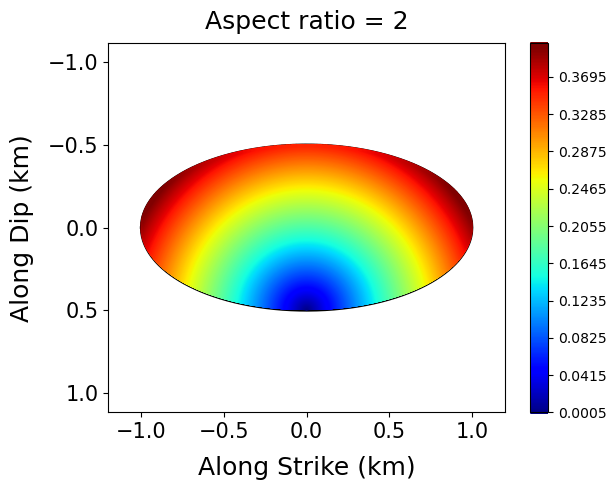

In [12]:
# Calculate second moment attributes
[t0, x0, y0], m2, T=second_moments(Lc, Wc, N, xc, yc, Vr, Vs)
dura=np.nanmax(T) # Actual rupture duration
tauc, Lc, Wc, vx, vy, v0, vc, dir_ratio, θ, α=rupture_params(m2)

print(f"Centroid time: {t0:.4f} s")
print(f"Centroid location: {x0:.4f}, {y0:.4f} km")
print(f"Rupture duration: {dura:.4f} s")
print(f"Characteristic duration: {tauc:.4f} s")
print(f"Characteristic length: {Lc:.4f} m")
print(f"Characteristic width: {Wc:.4f} m")
print(f"Directivity vector: {vx:.4f}, {vy:.4f} km/s")
print(f"Centroid vector orientation: {θ:.4f}°")
print(f"Major axis orientation: {α:.4f}°")
print(f"Characteristic rupture velocity: {vc:.4f} km/s")
print(f"Directivity ratio: {dir_ratio:.4f}")

# Plot rupture propagation on ellipse
Lc=1.
Wc=Lc/AR
N=1000 # Reduce number of grids practically only for plotting purpose
plot_rupture(Lc, Wc, N, xc, yc, Vr, Vs, tauc);

Note that the upgoing centroid vector ($\mathbf{v}_{0}$) is well resolved. However, while the centroid shifted in the up-dip direction, bilateral rupture propagation along the horizontal axis more dominantly influences the overall rupture process, resulting in the directivity ratio less than $0.5$, closer to bilateral rupture. Nonetheless, it would be misleading to classify this kind of rupture as either unilateral or bilateral (which are absolutely well defined for line source cases), as rupture propagation itself is inherently 2D.

Finally, it should be noted that the forward rupture model presented here assumes instantaneous and uniform slip over the entire rupture area (i.e. zero risetime), which may not well represent the rupture processes of real-world earthquakes (still, the second degree moments is well-defined). Hence, it would be interesting to explore how second degree moments would differ for same rupture geometry, but more realistic slip distributions, for example, finite risetime or crack-like ruptures.

## Inversion scheme based on apparent STF  (ASTF) durations

Now, I hope we are much familiar with the second degree moments representation of earthquake source and what key features we can learn from them. Since for the most cases, we do not know the actual spatiotemporal slip history of earthquake rupture, we must think about whether we can infer the second moments from seismic observables. Luckily, there exists well-formulated linear inversion scheme for inverting for $6$ second moment variables based on the measurements of apparent $\tau_{c}$. Below, I will describe in detail how the inverse problem of inferring the second moments based on the observation of $\tau_{c}$ could be formulated. One fundamental thing to note is that for the problem to be at least not mathematically *underdetermined*, there have to be minimum of $6$ apparent $\tau_{c}$ measurements with different azimuths and take-off angles (though this does not necessarily guarantee that the solution is stable).

The inversion method relies on the formalism that we can relate the observed apparent $\tau_{c}(\mathbf{s})$ as the product of linear operator $\mathbf{G}$ and the second moments $\mathbf{m}$ (from now on, the slowness vector at particular seismic station is denoted as $\mathbf{s}$):

$$
\begin{equation}
    \mathbf{d}=\mathbf{G}\cdot\mathbf{m},
\end{equation}
$$
where the data vector $\mathbf{d}$ is composed of $\tau_{c}(\mathbf{s})$ measurements at $N$ stations (either $P$ or $S$ phases).

The fact that we can use such a linear relation is really powerful, because we can apply widely used inversion technique for solving linear systems, for example, the least-squares method.

Above formalism has been introduced in the classical paper of **Silver (1983)**, but **McGuire (2004)** was the first to develop the inversion scheme to solve the linear system and applied it to several small $\left(\mathrm{M}\sim2\right)$ events in California. About a decade later, **McGuire (2017)** released MATLAB toolbox for obtaining the second moments based on the inversion scheme. In fact, Jeffrey J. McGuire, who was PhD student at MIT in the late 90s (now at USGS), worked on the problem of systematically characterizing the second degree moments of large teleseismic events under the supervision of Thomas H. Jordan (now at USC), which led to an interesting finding that the large earthquakes $\left(M_{\mathrm{w}}\geq7\right)$ are predominantly unilateral in the global scale (see **McGuire et al., 2002**). For quantifying the second moments of such large events based on the teleseismic waveforms, McGuire utilized differential phase-delay and amplitude information between the observed and synthetic P and Rayleigh waves to solve an inverse problem. However, it is unfeasible to calculate synthetics at sufficiently high-frequency $\left(>1\,\mathrm{Hz}\right)$ for the small events, while the apparent source durations could be practically measured based on the technique called *empirical Green's function (EGF)* method if nearby smaller event with identical location and focal mechanism is available.

Let's do simple math to derive the linear relation between $\mu^{(0,2)}(\mathbf{s})$ and the slowness vector $\mathbf{s}$. First, we express the apparent temporal moment $\mu^{(0,2)}(\mathbf{s})$ using the apparent source time function $\left(\mathrm{ASTF}\right)$ as $\displaystyle\mu^{(0,2)}(\mathbf{s})=\int\mathrm{ASTF}(t)\left(t-t_{0}\right)^{2}dt$, where $t_{0}$ is centroid time. Now, for convenience, we define the spatiotemporal coordinate so that origin time and location is shifted to the centroid, i.e., $t_{0}=0$ and $\mathbf{r}_{0}=\mathbf{0}$. Since, we can express $\displaystyle\mathrm{ASTF}(t)=\iint\dot{f}\left(\mathbf{r},\,t+\mathbf{r}\cdot\mathbf{s}\right)dV$, by plugging in $\mathrm{ASTF}(t)$ represented by $\dot{f}\left(\mathbf{r},\,t\right)$, we obtain the following expression for $\mu^{(0,2)}(\mathbf{s})$:

$$
\begin{equation}
    \mu^{(0,2)}(\mathbf{s})=\iint\dot{f}\left(\mathbf{r},\,t+\mathbf{r}\cdot\mathbf{s}\right)t^{2}dVdt.
\end{equation}
$$

Let $\tau=t+\mathbf{r}\cdot\mathbf{s}$, then we can further expand the temporal moment $\mu^{(0,2)}(\mathbf{s})$ as follows:

$$
\begin{equation}
    \mu^{(0,2)}(\mathbf{s})=\iint\dot{f}\left(\mathbf{r},\,\tau\right)\left(\tau-\mathbf{r}\cdot\mathbf{s}\right)^{2}dVd\tau \\
    =\iint\dot{f}\left(\mathbf{r},\,\tau\right)\left[\tau^{2}-2\left(\mathbf{s}\cdot\mathbf{r}\right)\tau+\mathbf{s}^{T}\cdot\mathbf{r}^{T}\mathbf{r}\cdot\mathbf{s}\right]dVd\tau \\
    =\left[\iint\dot{f}\left(\mathbf{r},\,\tau\right)\tau^{2}dVd\tau\right]-2\mathbf{s}\cdot\left[\iint\dot{f}\left(\mathbf{r},\,\tau\right)\mathbf{r}\tau dVd\tau\right]+\mathbf{s}^{T}\left[\iint\dot{f}\left(\mathbf{r},\,\tau\right)\mathbf{r}^{T}\mathbf{r}dV d\tau\right]\cdot\mathbf{s}.
\end{equation}
$$

Recall that the terms inside brackets define the temporal, spatiotemporal, and spatial moments. Hence, we can rewrite the last line as follows:

$$
\begin{equation}
    \mu^{(0,2)}(\mathbf{s})=\mu^{(0,2)}-2\mathbf{s}\cdot\pmb\mu^{\left(1,1\right)}+\mathbf{s}^{T}\cdot\pmb\mu^{\left(2,0\right)}\cdot\mathbf{s}.
\end{equation}
$$

Now, provided that we have multiple measurements of $\mu^{(0,2)}(\mathbf{s})$ corresponding to different $\mathbf{s}$, we can construct the linear system as previously mentioned (here we assume that the source is small enough so that the slowness vector $\mathbf{s}$ could be approximated as constant within the source volume).

In principle, one can solve the linear system in three-dimensional space, for $10$ second degree moment elements. In reality, it would be practical to assume that the rupture occurred within the *a priori* known fault plane and reduce the variables to $6$. This should help reduce the non-uniqueness of the inverse problem, given the usual sparsity of data. Nonetheless, one should keep in mind that incorrectly prescribed fault plane could result in bias of inverted second moments. Common practice is to assume two possible nodal planes available from double-couple focal mechanism and select one that better fits the data. Therefore, it also has potential to resolve the fault plane ambiguity or cross-validate the fault plane defined from the aftershock relocation.

To implement the described inversion scheme with computer codes, we need to explicitly write down the matrix $\mathbf{G}$ in terms of *fault plane geometry (strike - $\theta$, dip - $\delta$)* and *slowness vector (azimuth, take-off angle)*. Let's define the Cartesian coordinate as $x$ positive northward, $y$ positive eastward, and $z$ positive downward. We want to rotate the coordinate so that $x'$ positive along strike, $y'$ fault normal, and $z'$ along dip (down-dip). 

Then, one can write the basis vectors on new coordinate system as follows (refer to the lecture note of Charles J. Ammon - http://eqseis.geosc.psu.edu/cammon/HTML/UsingMATLAB/PDF/ML1%20FaultNormals.pdf):

$$
\begin{equation}
    \mathbf{e}_{x'}=\begin{bmatrix} \cos(\theta) & \sin(\theta) & 0 \end{bmatrix}^{T} \\
    \mathbf{e}_{z'}=\begin{bmatrix} -\sin(\theta)\cos(\delta) & \cos(\theta)\cos(\delta) & \sin(\delta) \end{bmatrix}^{T} \\
    \mathbf{e}_{y'}=\mathbf{e}_{z'}\times\mathbf{e}_{x'}.
\end{equation}
$$

Now, we take two-step approach to rotate a vector in $xyz$ coordinate to new $x'y'z'$ coordinate. First, we fix $z$ and rotate $x$ and $y$ to align $x$ to the strike direction ($x'$). Such rotation matrix is defined as $\mathbf{R}_{1}=\begin{bmatrix} \cos(\theta) & \sin(\theta) & 0 \\ -\sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}$. Second, we fix the rotated $x'$ and rotate $z$ to the down-dip direction using another rotation matrix $\mathbf{R}_{2}=\begin{bmatrix} 1 & 0 & 0 \\ 0 & \sin(\delta) & -\cos(\delta) \\ 0 & \cos(\delta) & \sin(\delta) \end{bmatrix}$. Using the matrices $\mathbf{R}_{1}$ and $\mathbf{R}_{2}$, we can rotate a slowness vector $\mathbf{s}$ in $xyz$ coordinate to $\mathbf{s'}$ in $x'y'z'$ coordinate by $\mathbf{s'}=\mathbf{R_{2}}\left(\mathbf{R}_{1}\cdot\mathbf{s}\right)$.

In addition, we have to express the matrix $\mathbf{G}$ in terms of slowness vector $\mathbf{s'}=\left(s_{1},\,s_{2}\right)$ (subscript $1$ for along strike, $2$ for down-dip). This is done by simply evaluating the equation $\mu^{(0,2)}(\mathbf{s})=\mu^{(0,2)}-2\mathbf{s}\cdot\pmb\mu^{\left(1,1\right)}+\mathbf{s}^{T}\cdot\pmb\mu^{\left(2,0\right)}\cdot\mathbf{s}$ by plugging in $\mathbf{s'}=\left(s_{1},\,s_{2}\right)$, which leads to following relation:

$$
\begin{equation}
    \mu^{(0,2)}(\mathbf{s})=\begin{bmatrix} s_{1}^{2} & 2s_{1}s_{2} & s_{2}^{2} & -2s_{1} & -2s_{2} & 1 \end{bmatrix} \cdot \begin{bmatrix} \mu_{11}^{(2,0)} & \mu_{12}^{(2,0)} & \mu_{22}^{(2,0)} & \mu_{1}^{(1,1)} & \mu_{2}^{(1,1)} & \mu^{(0,2)} \end{bmatrix}.
\end{equation}
$$

Given $N$ measurements of $\mu^{(0,2)}(\mathbf{s})$, we can finally expand the above equation into desired linear equation, $\mathbf{d}=\mathbf{G}\cdot\mathbf{m}$, where $\mathbf{d}$ is $\left(N\times1\right)$ data vector composed of $\mu^{(0,2)}(\mathbf{s})$, $\mathbf{G}$ is $\left(N\times6\right)$ slowness matrix projected to fault plane, and $\mathbf{m}$ is $\left(6\times1\right)$ vector composed of second degree moment elements.

Below, I wrote a script for constructing slowness matrix $\mathbf{G}$ given $\left(N\times1\right)$ `NumPy` arrays of pre-calculated azimuths, take-off angles, phases ($P$ or $S$) for known strike and dip. Also, $P$ and $S$ wave phase velocites at the source region should be given. Note that azimuth and take-off angles could be calculated using `ObsPy` modules such as `obspy.geodetics.base.gps2dist_azimuth` and `obspy.taup.tau.TauPyModel.get_travel_times_geo` if both the station coordinates and the source hypocenter is known.

**`slowness_matrix`**

In [13]:
@njit(nopython=True)
def slowness_matrix(az_array, toa_array, phase_array, strike, dip, Vp, Vs):
    
    '''
    Calculate slowness matrix G to predict tauc from second degree moments
    
    Input params
        az_array: length N array of azimuths for N measurements
        toa_array: length N array of take-off angles for N measurements (0 °= downgoing / 180 °= upgoing)
        phase_array: phase type (P or S), necessary for calculating slowness vector
        strike, dip: calculated from focal mechanism
        Vp, Vs: phase velocities
        
    Output params
        G: slowness matrix (N X 6)
    '''
    
    ############### Coordinate definition ###############
    # x: North / y: East / z: Down (positive) 
    # x': Along strike / y': Fault normal / z': Down-dip

    # Initialize variables
    N=len(az_array) # data length
    G=np.zeros((N, 6)) # slowness matrix
    toa=np.zeros(N) # take-off angles
    rsv=np.zeros((N, 3)) # matrix of slowness vectors
    
    # Calculate slowness matrix G
    for i in range(N):
        # Azimuth and take-off angle (in radians)
        az=np.deg2rad(az_array[i])
        toa=np.deg2rad(toa_array[i])
        phase=phase_array[i] # phase type

        # Get unit vector along the raypath
        rh=np.sin(toa) 
        rv=np.cos(toa) # z is positive down
        rsv[i][2]=rv
        rsv[i][0]=rh*np.cos(az) # x is positive north
        rsv[i][1]=rh*np.sin(az) # y is positive east

        # Calculate slowness vector and rotate to new coordinate (x', y', z')
        if phase=="P":
            s=(1/Vp)*np.array([rsv[i][0], rsv[i][1], rsv[i][2]])
        else:
            s=(1/Vs)*np.array([rsv[i][0], rsv[i][1], rsv[i][2]])

        # Rotation matrices (R1 & R2)
        zz=np.deg2rad(strike)
        rotm=np.array([[np.cos(zz),  np.sin(zz), 0.],
                       [-np.sin(zz), np.cos(zz), 0.],
                       [0.,           0.,        1.]])
        s=rotm@s

        zz=np.deg2rad(dip-90)
        rotm=np.array([[1.,      0.,           0.        ],
                       [0.,      np.cos(zz),   np.sin(zz)],
                       [0.,      -np.sin(zz),  np.cos(zz)]]) 
        s=rotm@s

        # Express G in terms of slowness vector s
        G[i][0]=1 # Time - Time
        G[i][1]=-2*s[0] # Along strike - Time
        G[i][2]=-2*s[2] # Downdip - Time
        G[i][3]=s[0]*s[0] # Along strike - Along strike
        G[i][4]=s[0]*s[2] # Along strike - Downdip
        G[i][5]=s[2]*s[2] # Downdip - Downdip
        
    return G

In [14]:
slowness_matrix(np.array([0.]), np.array([90.]), np.array(["S"]), 0., 90., 5.8, 3.5);

Now, we learned how $\mathbf{G}$ is constructed from projection of slowness vector onto the fault plane. Then, can we simply solve the equation by well-known linear algebra solver such as `scipy.linalg.solve`? Unfortunately, the problem is not that simple, because it is well known that the naïve inversion often leads to unphysical solution, such as that with negative source volume (such kind of problem was discussed by **Das & Kostrov (1997)**). Simple solution to impose the physical constraints is to positivity of source volume, which is equivalent to saying that the $4\times4$ matrix $\begin{bmatrix} \mu^{(0,2)} & \pmb\mu^{(1,1)T} \\ \pmb\mu^{(1,1)} & \pmb\mu^{(2,0)} \end{bmatrix}$ *positive semidefinite* matrix. Imposing such a constraint leads to nonlinear problem, but the problem itself is *convex*, which means that we can apply the specifically developed tools for solving the set of inverse problems called convex optimization problems (**Vandenberghe & Boyd, 1996**). In addition to nonnegative source volume, we additionally impose the constraint that the temporal moment $\mu^{(0,2)}$ must be equal to or less than $2$ times maximum $\mu^{(0,2)}(\mathbf{s})$, which likely holds for the cases with sufficiently various azimuths and take-off angles.

Below, I include the script to solve the linear system by taking advantage of package `CVXPY`, which is tailored for solving the class of convex problems. For the detailed usage of `CVXPY`, I refer to nice Medium article (https://medium.com/@dylanskinner65/convex-linear-optimization-with-cvxpy-5fa1024254ff). To solve the inverse problem with `CVXPY` you must clearly define the equation to solve along with the constraints which the solution must satisfy.

For our problem, it could be written as follows:

$$\mathrm{minimize}\quad\lVert Ax-b \lVert_{p}\,(p=1\,\,\mathrm{or}\,\,2)$$
$$\mathrm{subject\,\,to}\quad\begin{bmatrix} x_{1} & x_{2} & x_{3} \\ x_{2} & x_{4} & x_{5} \\ x_{3} & x_{5} & x_{6} \end{bmatrix}\succcurlyeq 0$$

$$\mathrm{where}\quad x=[x_{1}\,x_{2}\,x_{3}\,x_{4}\,x_{5}\,x_{6}]^{T}$$
$$\mathrm{and}\quad x_{1}\leq2\times\max(b).$$

Note that $x_{1}$ is the temporal moment, $x_{2}$ and $x_{3}$ are the spatiotemporal moment, and the remaining three elements define the spatial moment (order is different from previous equations).

**I also would like to emphasize that the code below heavily benefited from the existing MATLAB scripts written by Jeffrey J. McGuire (USGS) and Haoran Meng (SUSTech). I truly appreciate them for making the codes openly available.**

* McGuire's scripts: https://www2.whoi.edu/staff/jmcguire/software

* Meng's scripts: https://github.com/seismo-netizen/2ndMnt_Inv

In [15]:
import cvxpy as cp

**`second_moment_inversion`**

In [16]:
def second_moment_inversion(G, b, norm="l2"):
    
    '''
    Solve convex optimization problem using CVXPY to invert for the second degree moments
    
    Input params
        G: slowness matrix (N X 6)
        b: data vector (N X 1)
        
    Output params
        x.value: second degree moments (6 X 1 - [tt, xt, yt, xx, xy, yy])
    '''
    
    # Define matrix X using CVXPY variable
    x=cp.Variable(6)

    # Define the objective function
    # Interestingly, results slightly differ depending on norm choice even for the error-free case
    if norm=="l2":
        misfit=cp.sum_squares(G@x-b)
    elif norm=="l1":
        misfit=cp.sum(cp.abs(G@x-b))
    objective=cp.Minimize(misfit)

    # Define the constraints
    X=cp.Variable((3, 3), symmetric=True)
    constraints=[
        X[0][0]==x[0],
        X[0][1]==x[1],
        X[0][2]==x[2],
        X[1][0]==x[1],
        X[1][1]==x[3],
        X[1][2]==x[4],
        X[2][0]==x[2],
        X[2][1]==x[4],
        X[2][2]==x[5],
        x[0] <= 2*np.max(b),
        X>>0 # positive semidefinite
    ]

    # Define the problem
    problem=cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve(max_iters=10000)
    
    return x.value

Below I provide the script that combines **`slowness_matrix`** and **`second_moment_inversion`** to directly invert for the second degree moments given slowness ($\mathbf{s}$) and $\tau_{c}(\mathbf{s})$ measurements.

**`run_inversion`**

In [17]:
def run_inversion(tauc_array, az_array, toa_array, phase_array, strike, dip, Vp, Vs):
    
    '''
    Directly obtain second degree moments from slowness and tauc measurements
    
    Input params
        az_array: length N array of azimuths for N measurements
        toa_array: length N array of take-off angles for N measurements (0 °= downgoing / 180 °= upgoing)
        phase_array: phase type (P or S), necessary for calculating slowness vector
        strike, dip: calculated from focal mechanism
        Vp, Vs: phase velocities
        
    Output params
        tauc: characteristic duration
        Lc: characteristic length
        Wc: chracteristic width
        vx, vy: centroid velocity (x: strike, y: dip)
        v0: magnitude of centroid velocity
        vc: characteristic velocity
        dir_ratio: v0/vc (unilateral: 1 / bilateral: 0)
        rake: anticlockwise angle of centroid vector direction from strike
        alpha: angle of major axis (largest eigenvector) relative to strike 
        vr_abs: variance reduction following original definition
        vr_rel: modified variance reduction calculated with demeaned data
    '''
    
    ############# Conduct inversion #############
    b=(tauc_array/2)**2 # Get apparent tauc measurements and convert to temporal moment
    G=slowness_matrix(az_array, toa_array, phase_array, strike, dip, Vp, Vs) # calculate slowness matrix G
    m2=second_moment_inversion(G, b, norm="l1") # conduct inversion
    
    # Calculate absolute and relative variance reductions
    x, y=b, G@m2
    vr_abs=(1-(np.sum((y-x)**2)/np.sum((y)**2)))*100
    vr_rel=(1-(np.sum((y-x)**2)/np.sum((y-np.mean(y))**2)))*100
    
    ############## Convert second moments to interpretable parameters #############
    tauc, Lc, Wc, vx, vy, v0, vc, dir_ratio, rake, alpha=rupture_params(m2)
    
    return np.array([tauc, Lc, Wc, vx, vy, v0, vc, dir_ratio, rake, alpha, vr_abs, vr_rel])

## Inversion test with synthetic example

Now, we should check if the script above indeed works properly. Since we already have forward modeling tool (though it deals with very idealized cases) to compute the second moments from particular rupture scenario, we can test if our inversion code returns exactly the theoretical values computed from the input model. After the verification, we can (and must!) proceed to applying the inversion code to real-world observations.

To generate the synthetic dataset we must prescribe hypothetical station geometry as well as the fault geometry, the rupture scenario, and the velocity model. For simplicity, we ignore the contribution of station elevation on the slowness calculation (generally expected to be negligible compared to the other epistemic uncertainties). We use 1D model `ak135` provided by `obspy.taup` (by default) to calculate the synthetic take-off angles. Also, we take the station geometry used to analyze the 2020 $M_{\mathrm{w}}\,3.3$ Haenam earthquake in southwestern Korean Peninsula.

### Load station table

In [18]:
import pandas as pd
station_table=pd.read_csv("./example/haenam_stations_100km.csv", sep=',')
station_table.head()

,Network,Code,Latitude,Longitude,Elevation,Sensor
0,KS,AMD,35.3437,126.0300,79.0,HH
1,KS,BGDB,34.7726,125.9469,38.0,HH
2,KS,CGPA,34.8768,126.9710,144.0,HG
3,KS,CHDA,34.2368,127.2496,87.0,HG
4,KS,CJD,33.9594,126.2934,91.0,HH


### Calculate azimuths and take-off angles from 1D velocity model and hypocenter

In [19]:
from obspy.geodetics.base import gps2dist_azimuth
from obspy.taup import TauPyModel
model=TauPyModel(model="ak135")

In [20]:
evla, evlo, evdp=34.6628, 126.4013, 20.58 # Hypocenter location of 2020 Mw 3.3 Haenam earthquake hypocenter
azimuth_list, toa_list, phase_list=[], [], []
for i in range(len(station_table)):
    stla, stlo=station_table["Latitude"][i], station_table["Longitude"][i] # Get station coordinates
    azimuth=gps2dist_azimuth(evla, evlo, stla, stlo)[1] # Calculate azimuth
    s_arrivals=model.get_travel_times_geo(evdp, evla, evlo, stla, stlo, ["s", "S"])[0]
    p_arrivals=model.get_travel_times_geo(evdp, evla, evlo, stla, stlo, ["p", "P"])[0]
    s_toa, p_toa=s_arrivals.takeoff_angle, p_arrivals.takeoff_angle
    azimuth_list.append(azimuth) # S wave
    azimuth_list.append(azimuth) # P wave
    toa_list.append(s_toa) # S wave
    toa_list.append(p_toa) # P wave
    phase_list.append("S")
    phase_list.append("P")

azimuth_list=np.array(azimuth_list)
toa_list=np.array(toa_list)

### Generate synthetic $\tau_{c}(\mathbf{s})$ from forward rupture model

Here, we define another function **`pred_tauc`** to calculate synthetic $\tau_{c}(\mathbf{s})$ from forward model given station geometry.

**`pred_tauc`**

In [21]:
@njit(nopython=True)
def pred_tauc(az_array, toa_array, phase_array, strike, dip, Lc, Wc, N, xc, yc, Vr, Vp, Vs):
    '''
    Input params
        az_array: length N array of azimuths for N measurements
        toa_array: length N array of take-off angles for N measurements (0 °= downgoing / 180 °= upgoing)
        phase_array: phase type (P or S), necessary for calculating slowness vector
        strike, dip: calculated from focal mechanism
        Lc: characteristic rupture length
        Wc: characteristic rupture width
        N: number of grid along major axis of elliptical rupture area
        xc, yc: coordinate of hypocenter
        Vr: rupture front propagation speed
        Vp, Vs: phase velocities        
        
    Output params
        tauc_array: apparent tauc calculated from the input forward model
 
    '''
    
    [t0, x0, y0], m2, T=second_moments(Lc, Wc, N, xc, yc, Vr, Vs)
    G=slowness_matrix(az_array, toa_array, phase_array, strike, dip, Vp, Vs)
    tauc_array=2*np.sqrt(G@m2)
    
    return tauc_array

In [22]:
pred_tauc(np.array([0.]), np.array([90.]), np.array(["S"]), 0., 90., 1., 1., 10, 0., 0., 2.9, 5.8, 3.5);

In [23]:
###### Define the parameters ###### 
AR=2. # L/W
L=1. # km along the strike
W=L/AR # km along the dip
Vp, Vs=6.38, 6.38/1.73 # Shear wave velocity (km/s)
Vr=Vs*0.8 # Rupture velocity (km/s)
strike, dip=108., 58. # Fault geometry

###### Hypocenter location ###### 
xc, yc=-L, 0. # Unilateral case
N=10000 # Accuracy increases with grid number

In [24]:
[t0, x0, y0], m2, T=second_moments(L, W, N, xc, yc, Vr, Vs)
tauc, Lc, Wc, vx, vy, v0, vc, dir_ratio, θ, α=rupture_params(m2)
tauc_array=pred_tauc(azimuth_list, toa_list, phase_list, strike, dip, L, W, N, xc, yc, Vr, Vp, Vs)

print(f"Centroid time: {t0:.4f} s")
print(f"Centroid location: {x0:.4f}, {y0:.4f} km")
print(f"Rupture duration: {dura:.4f} s")
print(f"Characteristic duration: {tauc:.4f} s")
print(f"Characteristic length: {Lc:.4f} m")
print(f"Characteristic width: {Wc:.4f} m")
print(f"Directivity vector: {vx:.4f}, {vy:.4f} km/s")
print(f"Centroid vector orientation: {θ:.4f}°")
print(f"Major axis orientation: {α:.4f}°")
print(f"Characteristic rupture velocity: {vc:.4f} km/s")
print(f"Directivity ratio: {dir_ratio:.4f}")

Centroid time: 0.3518 s
Centroid location: -0.0000, -0.0000 km
Rupture duration: 0.4066 s
Characteristic duration: 0.3287 s
Characteristic length: 1000.0011 m
Characteristic width: 499.9979 m
Directivity vector: 3.0335, -0.0000 km/s
Centroid vector orientation: 0.0000°
Major axis orientation: 180.0000°
Characteristic rupture velocity: 3041.8855 km/s
Directivity ratio: 0.9972


### Run inversion with synthetic $\tau_{c}(\mathbf{s})$

In [25]:
[tauc, Lc, Wc, vx, vy, v0, vc, dir_ratio, θ, α, vr_abs, vr_rel]=run_inversion(tauc_array, azimuth_list, toa_list, phase_list, strike, dip, Vp, Vs)

print(f"Characteristic duration: {tauc:.4f} s")
print(f"Characteristic length: {Lc:.4f} m")
print(f"Characteristic width: {Wc:.4f} m")
print(f"Directivity vector: {vx:.4f}, {vy:.4f} km/s")
print(f"Centroid vector orientation: {θ:.4f}°")
print(f"Major axis orientation: {α:.4f}°")
print(f"Characteristic rupture velocity: {vc:.4f} km/s")
print(f"Directivity ratio: {dir_ratio:.4f}")
print(f"Variance reduction: {vr_rel:.4f}")

Characteristic duration: 0.3287 s
Characteristic length: 1000.0011 m
Characteristic width: 499.9979 m
Directivity vector: 3.0335, -0.0000 km/s
Centroid vector orientation: 0.0000°
Major axis orientation: 180.0000°
Characteristic rupture velocity: 3041.8855 km/s
Directivity ratio: 0.9972
Variance reduction: 100.0000


We can check that the inverted finite source attributes are exactly equal to the theoretically calculated values. In addition, the variance reduction is exactly $100\mathrm{\%}$. This is expected because synthetic $\tau_{c}(\mathbf{s})$ values were obtained as the product of slowness matrix $\mathbf{G}$ and known second moments $\mathbf{m}$. This shows that the inversion code works well. It would be good to also conduct additional synthetic tests, but using $\tau_{c}(\mathbf{s})$ calculated from synthetic $\mathrm{ASTF}s$, which would resemble how the actual measurements are made. There are also existing references of such synthetic tests, for example, **Meng et al. (2020)** and **Cuius et al. (2023)**.

Here, we dealt with the noise-free case in order to confirm that the code works well. However, to test how the inversion stability depends on the different factors, including station configuration, rupture kinematics, used phases (one can test with either $P$ or $S$), it would be good to rerun inversion with noise-added data as well (aleatoric uncertainties). Moreover, one can test how the incorrectly assumed velocity model or the hypocenter may affect the inversion results (epistemic uncertainties). It is obvious that depending on various factors, some components are likely well resolved, while others are rather poorly resolved (for example, characteristic width). Finally, it would be also interesting to check how the second moments inversion would work for the theoretically calculated values from frequently used alternative kinematic models, such as line source model (**Cesca et al., 2011**), Haskell's rectangular rupture model (**Haskell, 1964**), or Sato and Hirasawa's circular rupture model (**Sato & Hirasawa, 1973**). For the application of second moments inversion on dynamic crack-like models, I refer to nice reference by **McGuire & Kaneko (2018)**.

## Concluding remarks

Second degree moments representation of earthquake source is a mathematically consistent way to describe several key finite source attributes of interest. It has notable merit that the method is free of any kinematic parametrization of rupture process and hence applicable to any (kinematic or dynamic) source model regardless of its complexity (e.g., variable rupture velocity, complex slip distribution, etc.). However, it also has disadvantage that the inverted second moments do not provide details of rupture process up to degree which canonical kinematic slip inversion offers.

This is probably the reason why second moments inversion methods have not been widely used for the characterization of earthquake sources, except for few researchers such as Jeff J. McGuire and Boris G. Bukchin (passed away in 2022) and their collaborators (recently, Zach Ross group at Caltech). Obviously, if one can perform finite fault inversion or back-projection to image the detailed rupture process of large, impactful earthquake, second moments inversion is not really necessary, as it would provide too simplified view of actual rupture process. Rather, it could serve as quite useful method to systematically quantify the rupture processes of earthquakes in a consistent way, because more sophisticated methods heavily rely on the subjective assumptions and parametrization which often differ between research groups (e.g., **McGuire, 2002**). For example, it is usually not feasible to consistently perform finite-fault inversion for large set of earthquakes, because available data and assumed constraints differ for each earthquake. On the other hand, second moments inversion could be more consistent, because it does not rely on any subjective parametrization. Also, it could be an emerging alternative tool for quantifying relatively small $\left(\mathbf{M}\leq4\right)$ earthquakes in bulk, because lack of resolution often limits performing slip inversion of small events. Even if possible, kinematic slip inversion would likely suffer from notorious non-uniqueness of solutions due to the absence of geodetic (GNSS, InSAR) data. Small earthquakes are also relatively simple compared to their larger counterparts, which makes it easier to intuitively understand the physical meaning of finite source attributes obtained from the inversion. Ultimately, this could enable construction of improved scaling relationship between earthquake source parameters, such as seismic moment (potency) versus rupture length (or width), which is particularly important for earthquake physics as well as seismic hazard assessment.

## Further reading

Below, I include (incomplete) list of literatures related to either theoretical or application studies concerning the second degree (+ higher order degree) moments. Five highly recommended papers are marked with asterisks ($\mathbf{*}$). Papers are ordered by the year of publication.

**Papers related to theory development**

[1] Backus, G. E., & Mulcahy, M. (1976). Moment tensors and other phenomenological descriptions of seismic sources—I. Continuous displacements. Geophysical Journal International, 46(2), 341-361.

[2] Backus, G. E., & Mulcahy, M. (1976). Moment tensors and other phenomenological descriptions of seismic sources—II. Discontinuous displacements. Geophysical Journal International, 47(2), 301-329.

[3] Backus, G. E. (1977). Interpreting the seismic glut moments of total degree two or less. Geophysical Journal International, 51(1), 1-25.

[4] Backus, G. E. (1977). Seismic sources with observable glut moments of spatial degree two. Geophysical Journal International, 51(1), 27-45.

[5] Doornbos, D. J. (1982). Seismic source spectra and moment tensors. Physics of the earth and planetary interiors, 30(2-3), 214-227.

[6] Doornbos, D. J. (1982). Seismic moment tensors and kinematic source parameters. Geophysical Journal International, 69(1), 235-251.

[7] $\left(*\right)$ Silver, P. G. (1983). Retrieval of source-extent parameters and the interpretation of corner frequency. Bulletin of the Seismological Society of America, 73(6A), 1499-1511.

[8] Kagan, Y. Y. (1988). Multipole expansions of extended sources of elastic deformation. Geophysical Journal International, 93(1), 101-114.

[9] Bukchin, B. G. (1995). Determination of stress glut moments of total degree 2 from teleseismic surface wave amplitude spectra. Tectonophysics, 248(3-4), 185-191.

[10] Das, S., & Kostrov, B. V. (1997). Determination of the polynomial moments of the seismic moment rate density distribution with positivity constraints. Geophysical Journal International, 131(1), 115-126.

[11] Li, J., He, Y. M., & Yao, Z. X. (2006). Source finiteness and rupture propagation using higher-degree moment tensors. Bulletin of the Seismological Society of America, 96(4A), 1241-1256.

[12] $\left(*\right)$ McGuire, J. J., & Kaneko, Y. (2018). Directly estimating earthquake rupture area using second moments to reduce the uncertainty in stress drop. Geophysical Journal International, 214(3), 2224-2235.

[13] Matsu’ura, M., Noda, A., & Terakawa, T. (2019). Physical interpretation of moment tensor and the energetics of shear faulting. Tectonophysics, 771, 228228.

[14] Jordan, T. H., & Juarez, A. (2019). Representation of complex seismic sources by orthogonal moment-tensor fields. Geophysical Journal International, 216(3), 1867-1889.

[15] Jordan, T. H., & Juarez, A. (2021). Stress–strain characterization of seismic source fields using moment measures of mechanism complexity. Geophysical Journal International, 227(1), 591-616.

**Application papers on large (teleseismic) earthquakes**

[1] Silver, P. G., & Jordan, T. H. (1983). Total‐moment spectra of fourteen large earthquakes. Journal of Geophysical Research: Solid Earth, 88(B4), 3273-3293.

[2] Silver, P. G., & Masuda, T. (1985). A source extent analysis of the Imperial Valley earthquake of October 15, 1979, and the Victoria earthquake of June 9, 1980. Journal of Geophysical Research: Solid Earth, 90(B9), 7639-7651.

[3] Gomez, J. M., Bukchin, B. G., Madariaga, R., & Rogozhin, E. A. (1997). A study of the Barisakho, Georgia, earthquake of 1992 October 23 from broad-band surface and body waves. Geophysical Journal International, 129(3), 613-623.

[4] Gomez, J. M., Bukchin, B. G., Madariaga, R., Rogozhin, E. A., & Bogachkin, B. (1997). Rupture process of the 19 August 1992 Susamyr, Kyrgyzstan, earthquake. Journal of Seismology, 1(3), 219-235.

[5] McGuire, J. J., Zhao, L., & Jordan, T. H. (2000). Rupture dimensions of the 1998 Antarctic Earthquake from low‐frequency waves. Geophysical research letters, 27(15), 2305-2308.

[6] McGuire, J. J. (2000). Space-time rupture properties of large earthquakes (Doctoral dissertation, Massachusetts Institute of Technology).

[7] McGuire, J. J., Zhao, L., & Jordan, T. H. (2001). Teleseismic inversion for the second degree moments of earthquake space–time distributions. Geophysical Journal International, 145(3), 661-678.

[8] $\left(*\right)$ McGuire, J. J., Zhao, L., & Jordan, T. H. (2002). Predominance of unilateral rupture for a global catalog of large earthquakes. Bulletin of the Seismological Society of America, 92(8), 3309-3317.

[9] Clévédé, E., Bouin, M. P., Bukchin, B. G., Mostinskiy, A., & Patau, G. (2004). New constraints on the rupture process of the 1999 August 17 Izmit earthquake deduced from estimates of stress glut rate moments. Geophysical Journal International, 159(3), 931-942.

[10] Llenos, A. L., & McGuire, J. J. (2007). Influence of fore‐arc structure on the extent of great subduction zone earthquakes. Journal of Geophysical Research: Solid Earth, 112(B9).

[11] Clévédé, E., Bukchin, B. G., Favreau, P., Mostinskiy, A., Aoudia, A. B. D. E. L. K. R. I. M., & Panza, G. F. (2012). Long-period spectral features of the Sumatra–Andaman 2004 earthquake rupture process. Geophysical Journal International, 191(3), 1215-1225.

[12] Adamová, P., & Šílený, J. (2013). Disputable Non‐Double‐Couple Mechanisms of Several Strong Earthquakes: Second‐Degree Moment Approach. Bulletin of the Seismological Society of America, 103(5), 2836-2849.

[13] $\left(*\right)$ Atterholt, J., & Ross, Z. E. (2022). Bayesian Framework for Inversion of Second‐Order Stress Glut Moments: Application to the 2019 Ridgecrest Sequence Mainshock. Journal of Geophysical Research: Solid Earth, 127(4), e2021JB023780.

[14] Filippova, A. I., Bukchin, B. G., Fomochkina, A. S., Melnikova, V. I., Radziminovich, Y. B., & Gileva, N. A. (2022). Source process of the September 21, 2020 Mw 5.6 Bystraya earthquake at the south-eastern segment of the Main Sayan fault (Eastern Siberia, Russia). Tectonophysics, 822, 229162.

[15] Turner, A. R., Ferreira, A. M., Berbellini, A., Brantut, N., Faccenda, M., & Kendall, E. (2022). Across‐slab propagation and low stress drops of deep earthquakes in the Kuril subduction zone. Geophysical Research Letters, 49(16), e2022GL098402.

[16] Atterholt, J., & Ross, Z. E. (2022). Bayesian framework for inversion of second-order stress glut moments: application to the 2020 Mw 7.7 Caribbean Earthquake. Authorea Preprints.

[17] Atterholt, J., & Ross, Z. E. (2024). Finite source properties of large strike-slip earthquakes. Geophysical Journal International, 236(2), 889-903.

**Application papers on small earthquakes**

[1] $\left(*\right)$ McGuire, J. J. (2004). Estimating finite source properties of small earthquake ruptures. Bulletin of the Seismological Society of America, 94(2), 377-393.\

[2] Chen, P., Jordan, T. H., & Zhao, L. (2005). Finite-moment tensor of the 3 September 2002 Yorba Linda earthquake. Bulletin of the Seismological Society of America, 95(3), 1170-1180.

[3] Chen, P., Jordan, T. H., & Zhao, L. (2010). Resolving fault plane ambiguity for small earthquakes. Geophysical Journal International, 181(1), 493-501.

[4] McGuire, J. J. (2017). A MATLAB toolbox for estimating the second moments of earthquake ruptures. Seismological Research Letters, 88(2A), 371-378.

[5] Fan, W., & McGuire, J. J. (2018). Investigating microearthquake finite source attributes with IRIS Community Wavefield Demonstration Experiment in Oklahoma. Geophysical Journal International, 214(2), 1072-1087.

[6] Meng, H., McGuire, J. J., & Ben‐Zion, Y. (2020). Semiautomated estimates of directivity and related source properties of small to moderate Southern California earthquakes using second seismic moments. Journal of Geophysical Research: Solid Earth, 125(4), e2019JB018566.

[7] Fletcher, J. B., & Boatwright, J. (2020). Directivity of M 3.1 earthquake near Anza, California and the effect on peak ground motion. Bulletin of the Seismological Society of America, 110(1), 312-318.

[8] Meng, H., & Fan, W. (2021). Immediate foreshocks indicating cascading rupture developments for 527 M 0.9 to 5.4 Ridgecrest earthquakes. Geophysical Research Letters, 48(19), e2021GL095704.

[9] Cuius, A., Meng, H., Saraò, A., & Costa, G. (2023). Sensitivity of the second seismic moments resolution to determine the fault parameters of moderate earthquakes. Frontiers in Earth Science, 11, 1198220.

**Other useful resources**

[1] Haoran Meng's lecture note on second degree moments: https://github.com/seismo-netizen/Second_Seismic_Moment/blob/main/HaoranMeng_2ndMnt.pdf

[2] Haoran Meng's USGS seminar on second degree moments (theory and application on 2019 Ridgecrest aftershocks): https://earthquake.usgs.gov/contactus/menlo/seminars/1361

[3] Haoran Meng's SCEC poster on 2019 Ridgecrest aftershock second degree moments (unpublished work): https://central.scec.org/meetings/2021/am/poster/191

[4] Haoran Meng's USC doctoral dissertation (see Chapter 5): https://impa.usc.edu/archive/Detailed-properties-of-seismic-waveforms-and-earthquake-sources-in-Southern-California-2A3BF1W2SJQ9.html

[5] Jessica Donovan's USC doctoral dissertation (unpublished work): Forecasting Directivity in Large Earthquakes in Terms of the Conditional Hypocenter Distribution 

https://www.proquest.com/docview/2395769415?%20Theses&fromopenview=true&pq-origsite=gscholar&sourcetype=Dissertations%20&parentSessionId=VJcj5XKwPHZH5wCuYafyatjSkbN21SAWUguh5uEEQnU%3D

[6] James Atterholt's Caltech doctoral thesis (see Chapters 6 & 7): https://thesis.library.caltech.edu/16581/